# **AP157 Image Processing Demo Notebook**

## Module B1: Digital Image Formation and Enhancement

_Credits_: This demo notebook is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Introduction

With cameras found nearly everywhere, (in your phones and laptops, on surveillance CCTV’s, in cars, in laboratories, and in satellites) making objective sense out of images and video is a powerful skill to possess.

In the following activities, we first learn how to “make” synthetic digital images which we can use for modeling, analysis, and experiments. Images can be saved in different formats or modes depending on the application. Lastly, we learn how to enhance digital images for further use.

### 1. Creating Synthetic Images

It is sometimes necessary to create synthetic images for masking, testing algorithms, or simulating optical elements in imaging systems.

In simulations it is necessary to be accurate about the object parameters (e.g. diameter, length, distance between slits, etc.). A circle, for example, can simulate the aperture of lenses. The diameter of the aperture determines how much light the lens can collect which translates to how well the lens can resolve fine details. The 3D view allows you to inspect if you got the simulation correctly.

### 1.1. Creating centered circles

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
radius_ratio = 0.8
N = 256 #defines the image resolution, computationally efficient if set to 2^N

# Create grid
xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx) # both X and Y are NxN arrays with X and Y coordinates from [-1,1] centered at (0,0)
R = np.sqrt(X**2 + Y**2)  # NxN array with value equal to distance from center (radius)
A = np.zeros(np.shape(R)) # NxN array with all values = 0

# Set circular region in A
A[np.where(R < radius_ratio)] = 1.0

In [ ]:
len(xx), np.min(xx), np.max(xx), xx[1]-xx[0], 2./255

(256, -1.0, 1.0, 0.007843137254901933, 0.00784313725490196)

In [ ]:
np.shape(X)

(256, 256)

In [ ]:
np.shape(Y)

(256, 256)

In [ ]:
np.shape(R)

(256, 256)

In [ ]:
np.shape(A)

(256, 256)

In [ ]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
R

array([[1.41421356, 1.40867854, 1.40316553, ..., 1.40316553, 1.40867854,
        1.41421356],
       [1.40867854, 1.40312169, 1.39758676, ..., 1.39758676, 1.40312169,
        1.40867854],
       [1.40316553, 1.39758676, 1.39202982, ..., 1.39202982, 1.39758676,
        1.40316553],
       ...,
       [1.40316553, 1.39758676, 1.39202982, ..., 1.39202982, 1.39758676,
        1.40316553],
       [1.40867854, 1.40312169, 1.39758676, ..., 1.39758676, 1.40312169,
        1.40867854],
       [1.41421356, 1.40867854, 1.40316553, ..., 1.40316553, 1.40867854,
        1.41421356]])

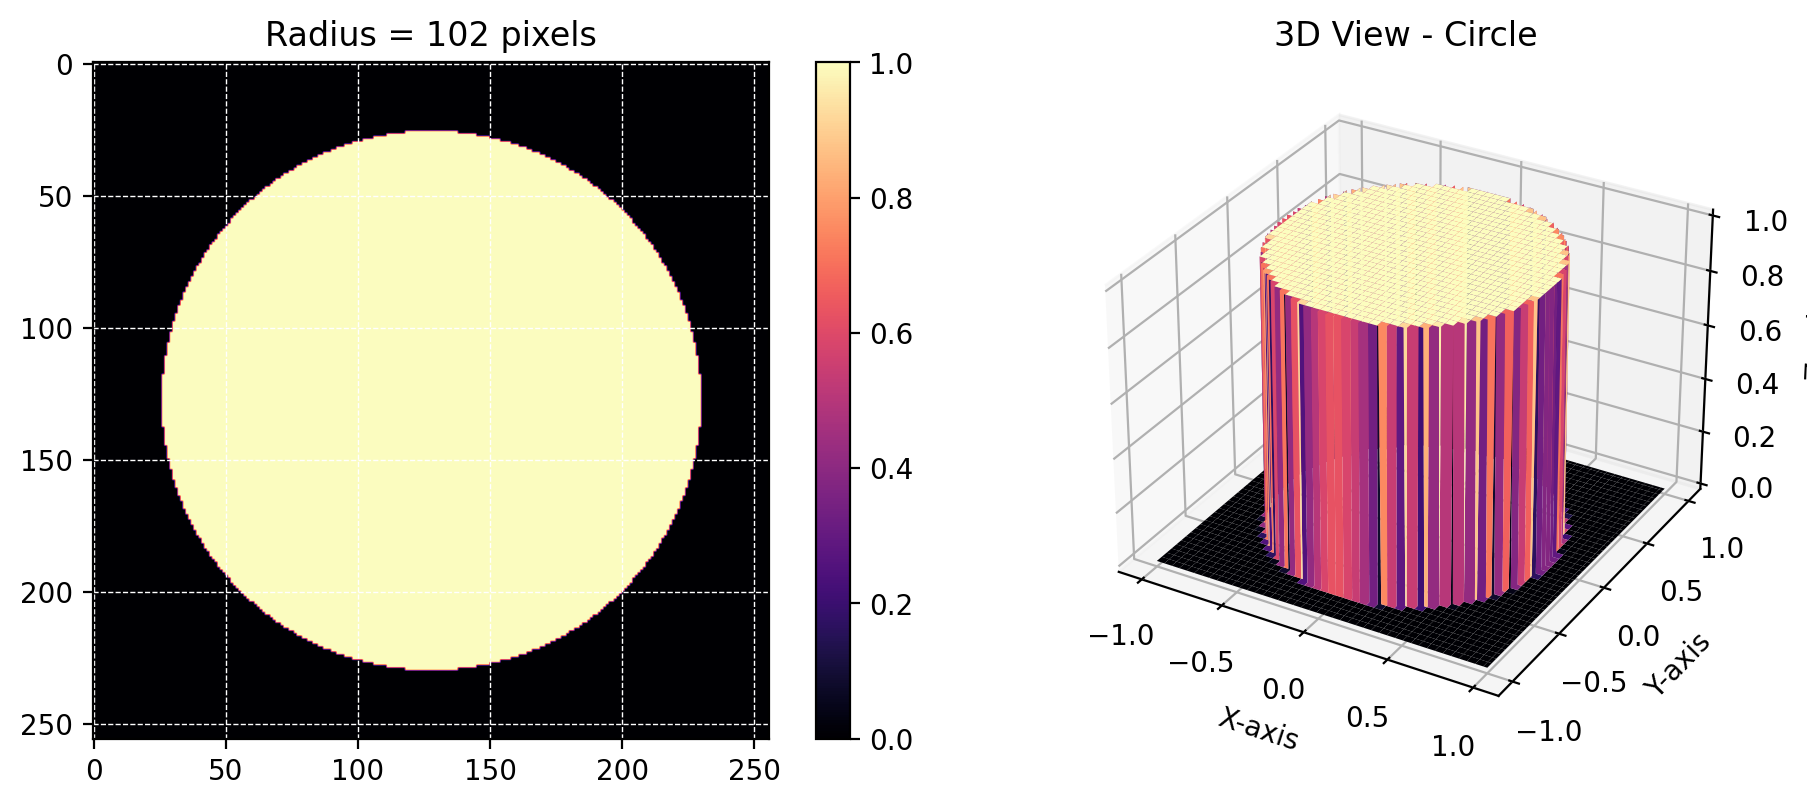

In [3]:
cmap = "magma"

# Create a 2D flat view and a 3D view of a synthetically generated circle
fig = plt.figure(figsize=(10, 4), dpi=200)

# 2D flat view
plt.subplot(121)
plt.title("Radius = " + str(int(radius_ratio * N / 2)) + " pixels")
plt.imshow(A, cmap=cmap)
plt.colorbar()  # Add colorbar to check pixel values
plt.grid(color='white', linestyle='--', linewidth=0.5)  # Add grid


# 3D view
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, A, cmap=cmap)

ax.set_title("3D View - Circle")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.grid(True)  # Add grid in 3D view


plt.tight_layout()  # optimize space usage
plt.show()

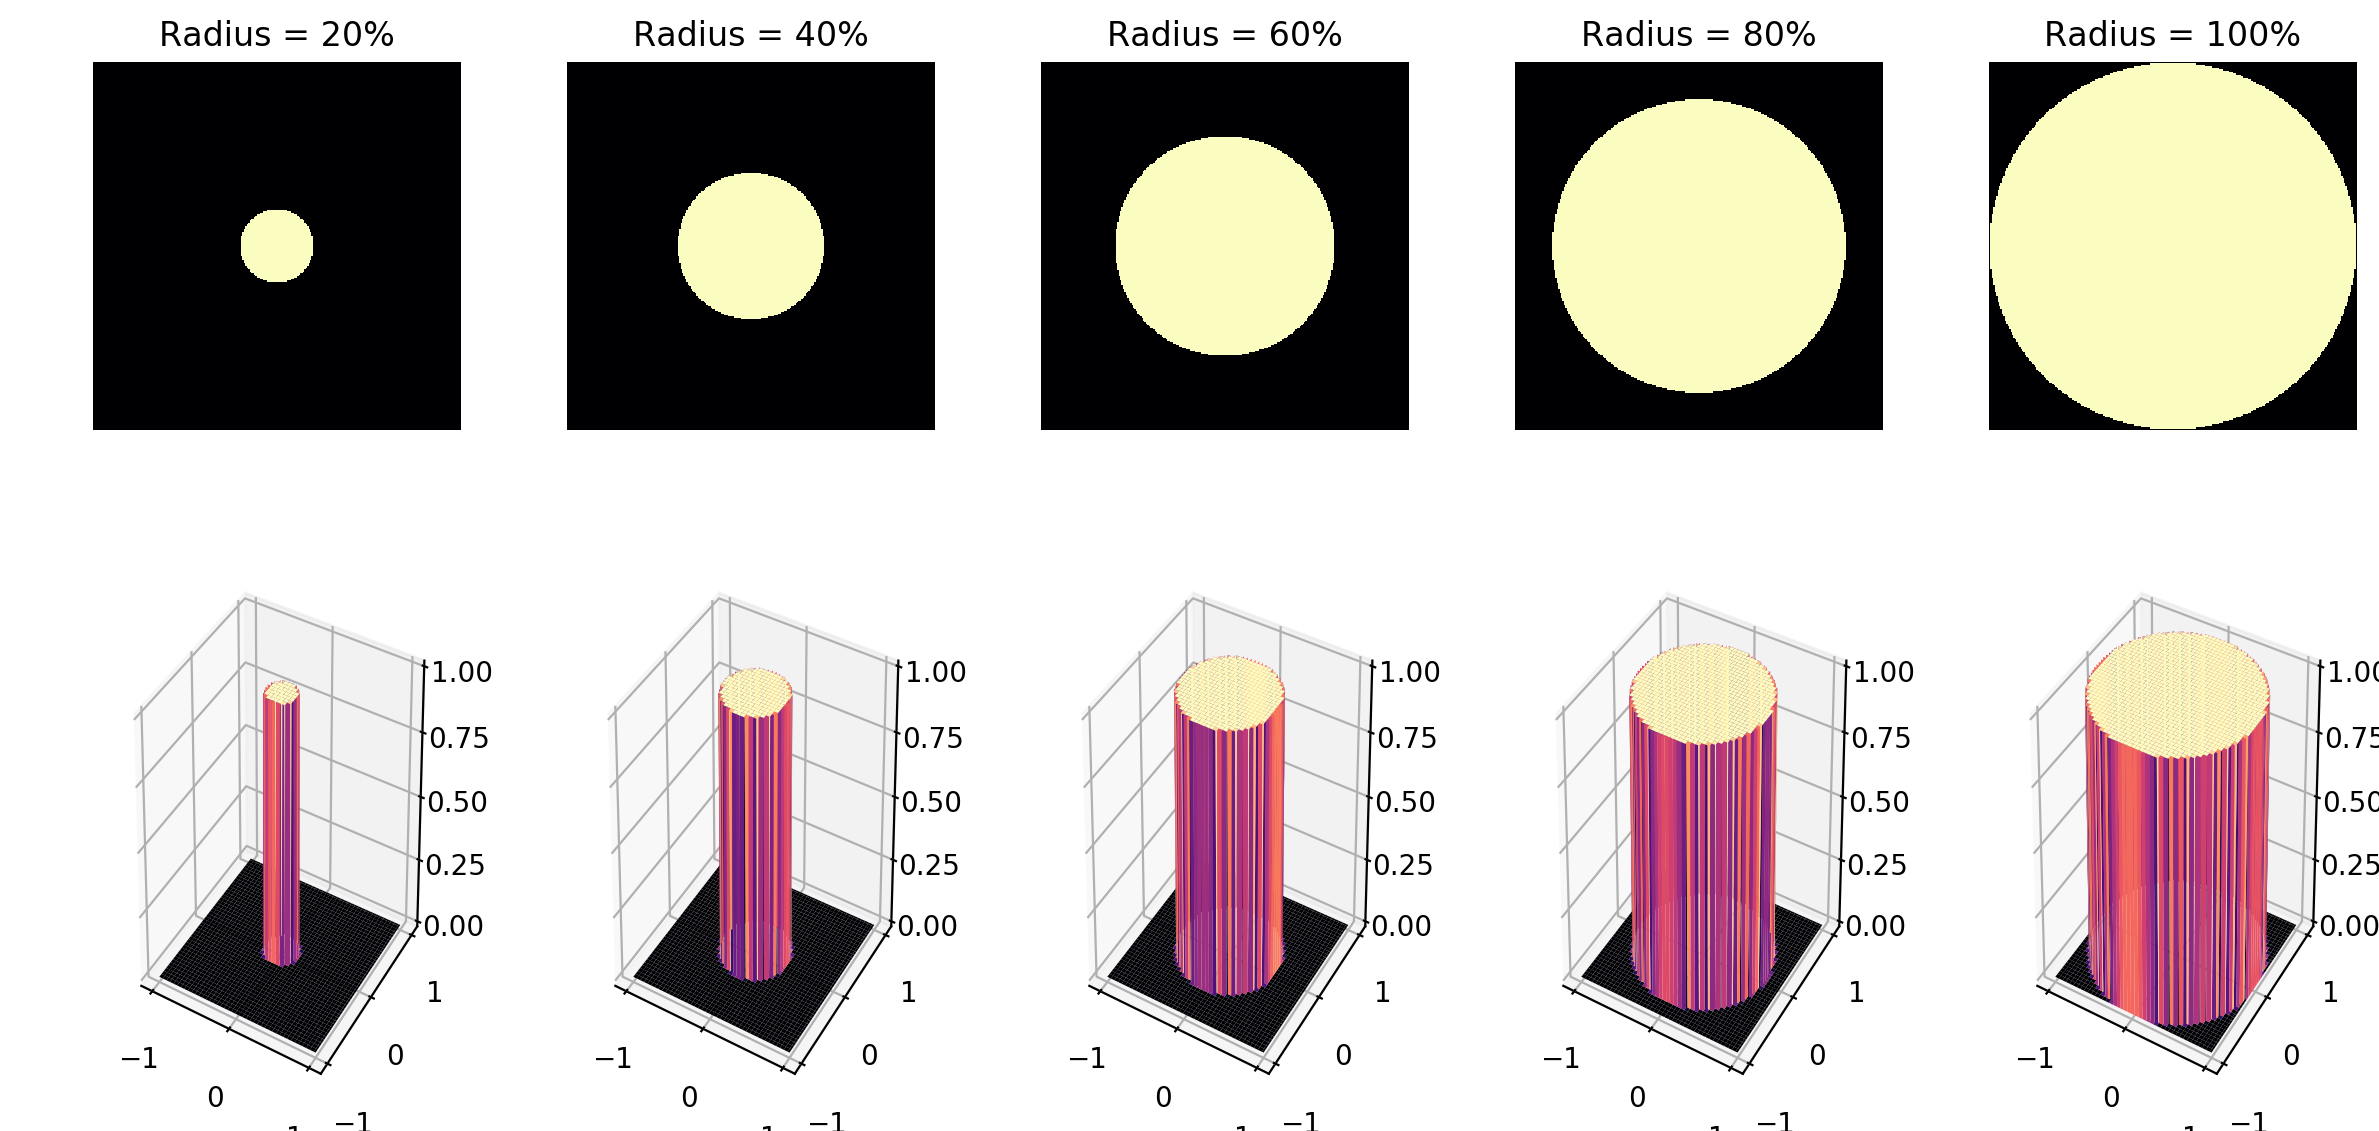

In [ ]:
# Create a figure with a single row of subplots
fig = plt.figure(figsize=(12, 6), dpi=200)

# Generate circular regions with different radii
for i in range(1, 6):
    radius_ratio = i * 0.2
    xx = np.linspace(-1, 1, N)
    X, Y = np.meshgrid(xx, xx)
    R = np.sqrt(X**2 + Y**2)
    A = np.zeros(np.shape(R))

    # Set circular region in A
    A[np.where(R < radius_ratio)] = 1.0

    # Plot 2D subplot
    plt.subplot(2, 5, i)
    plt.title("Radius = " + str(int(radius_ratio * 100)) + "%")
    plt.axis('off')  # Turn off axis for cleaner visualization
    plt.imshow(A, cmap=cmap)

    # Plot 3D subplot
    ax = fig.add_subplot(2, 5, i + 5, projection='3d')
    ax.plot_surface(X, Y, A, cmap=cmap)
    ax.grid(True)  # Add grid in 3D view

plt.tight_layout()  # optimize space usage
plt.show()

### 1.2 Creating an annulus

For example, Hubble's primary mirror is an annulus.

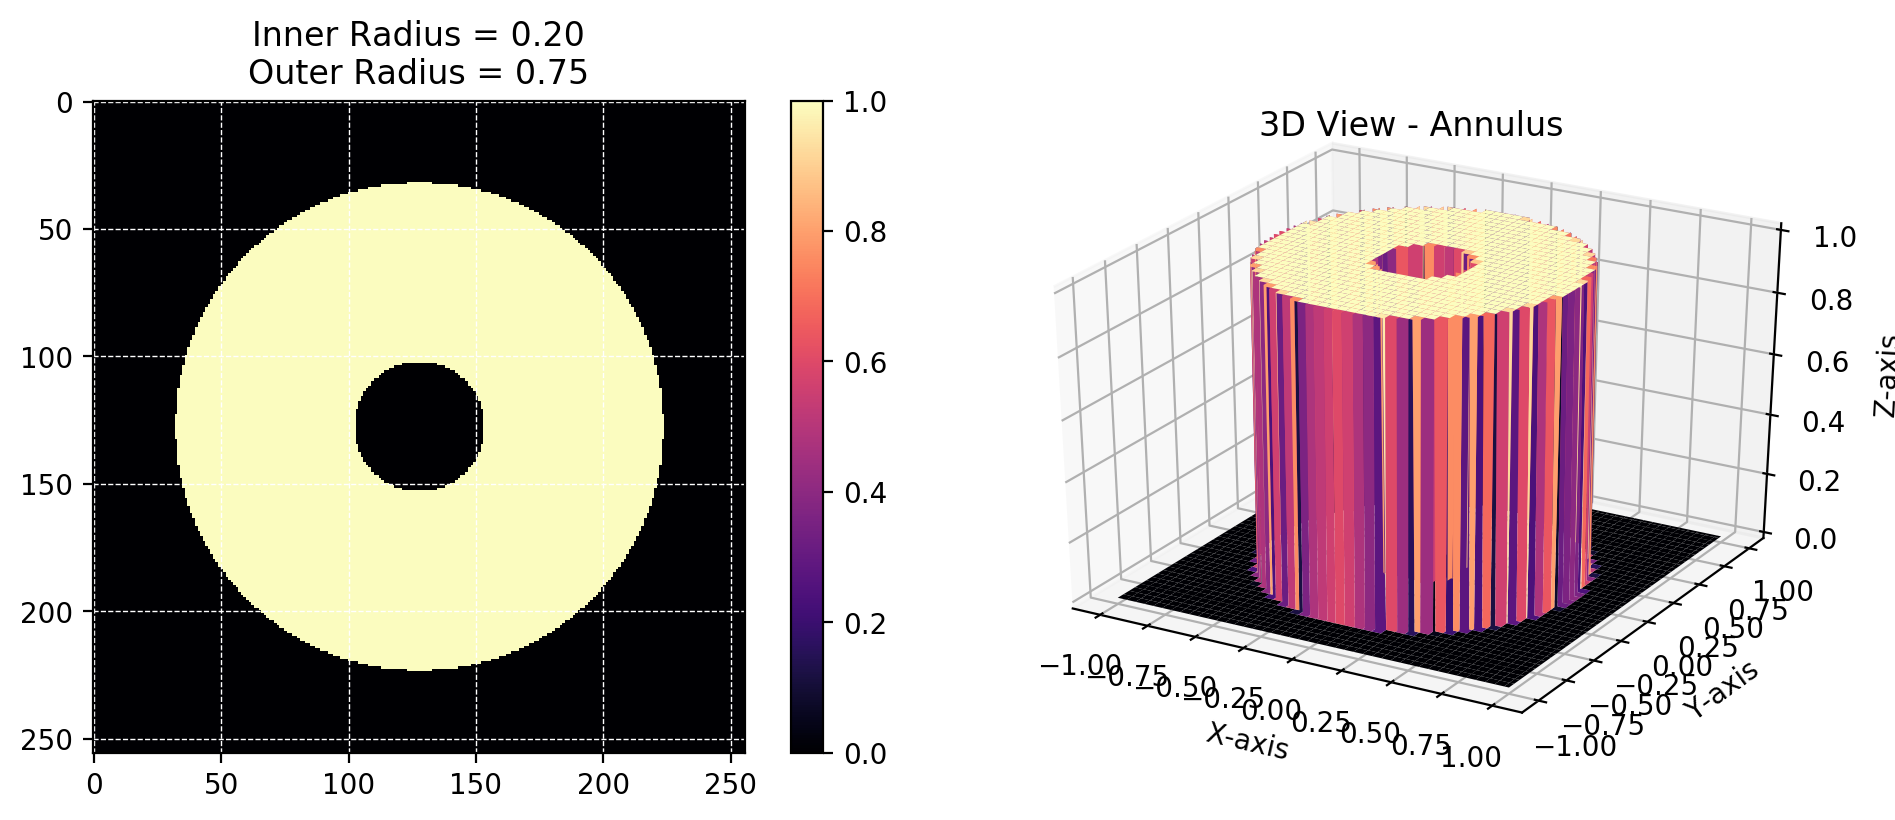

In [ ]:
N = 256
inner_radius = 0.2
outer_radius = 0.75

xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx)

# Create an annulus shape
R = np.sqrt(X**2 + Y**2)
annulus = np.zeros(np.shape(R))
annulus[np.where((R < outer_radius) & (R >= inner_radius))] = 1.0

# Create a 2D flat view and a 3D view of the annulus
fig = plt.figure(figsize=(10, 4), dpi=200)

# 2D flat view
plt.subplot(121)
plt.title('Inner Radius = %.2f' % inner_radius + '\nOuter Radius = %.2f' % outer_radius)
plt.imshow(annulus, cmap=cmap)
plt.colorbar()  # Add colorbar to check pixel values
plt.grid(color='white', linestyle='--', linewidth=0.5)  # Add grid

# 3D view
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, annulus, cmap=cmap)

ax.set_title("3D View - Annulus")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.grid(True)  # Add grid in 3D view

plt.tight_layout()  # Optimize space usage
plt.show()

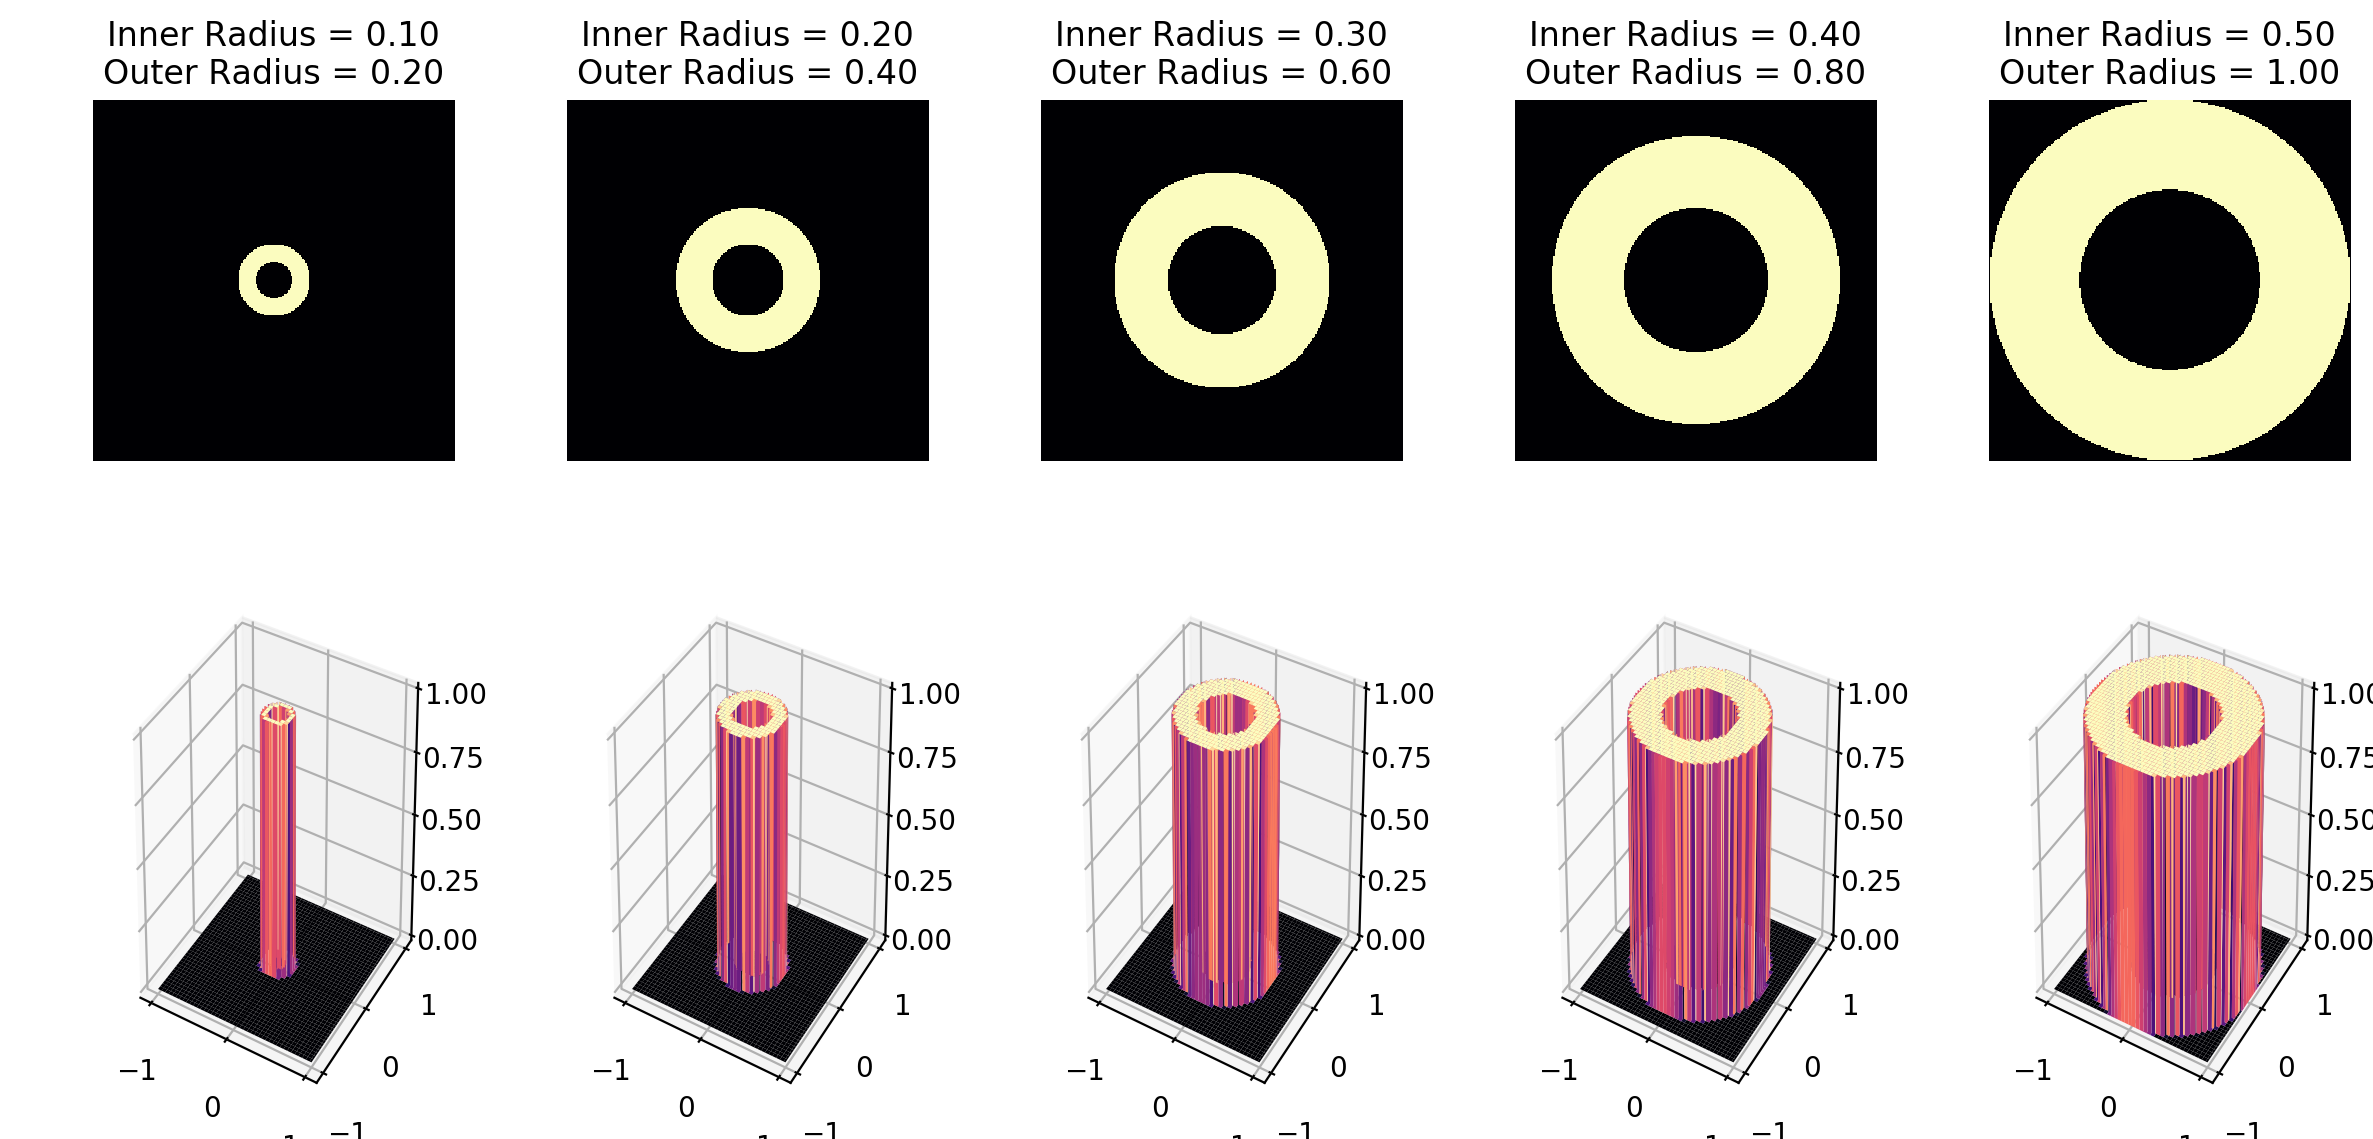

In [ ]:
# Create a figure with a single row of subplots
fig = plt.figure(figsize=(12, 6), dpi=200)

# Generate annulus shapes with different inner and outer radii
for i in range(1, 6):

    inner_radius = i * 0.1
    outer_radius = i * 0.2

    xx = np.linspace(-1, 1, N)
    X, Y = np.meshgrid(xx, xx)
    R = np.sqrt(X**2 + Y**2)

    annulus = np.zeros(np.shape(R))
    annulus[np.where((R < outer_radius) & (R >= inner_radius))] = 1.0

    # Plot 2D subplot
    plt.subplot(2, 5, i)
    plt.title('Inner Radius = %.2f' % inner_radius + '\nOuter Radius = %.2f' % outer_radius)
    #plt.title(f'Inner Radius = {inner_radius:.0%}\nOuter Radius = {outer_radius:.0%}')#, fontsize=8)
    plt.axis('off')  # Turn off axis for cleaner visualization
    plt.imshow(annulus, cmap=cmap)

    # Plot 3D subplot
    ax = fig.add_subplot(2, 5, i + 5, projection='3d')
    ax.plot_surface(X, Y, annulus, cmap=cmap)
    ax.grid(True)  # Add grid in 3D view

plt.tight_layout()  # optimize space usage
plt.show()

### 2. Creating Color Images

Due to our visions’ trichromatism we only need to overlay three primary colors in different proportions to produce a color image.

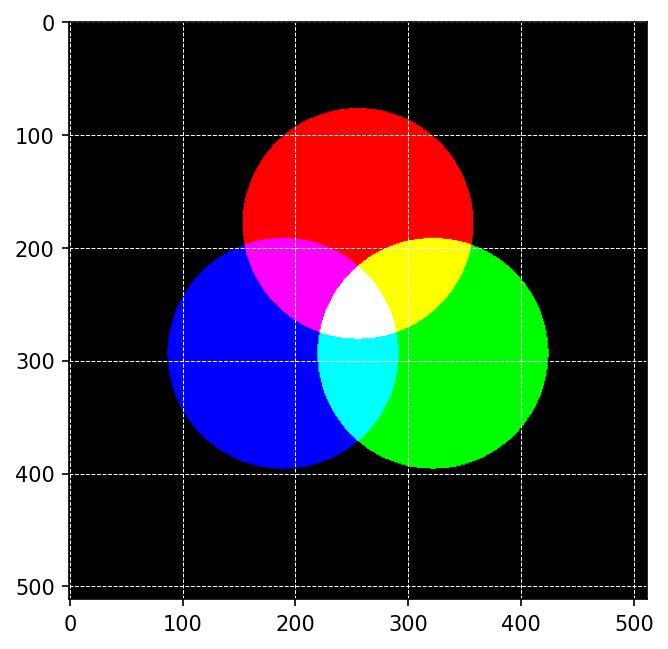

In [4]:
# Define the number of points along x and create a meshgrid
N = 512
x = np.linspace(-10, 10, num=N)
y = x
X, Y = np.meshgrid(x, y)

# Initialize arrays for red, green, and blue channels
Rd, Gn, Bl = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N))

# Draw colored circles
Rt, Rc, deg = 3, 4, 30

# Calculate the coordinates of the center of the colored circles
xt, yt = Rt * np.cos(deg * np.pi / 180), Rt * np.sin(deg * np.pi / 180)

# Calculate the distance from each point to the center of each circle and set color channels
R = np.sqrt((X) ** 2 + (Y + Rt) ** 2)
Rd[np.where(R < Rc)] = 1.0

R = np.sqrt((X - xt) ** 2 + (Y - yt) ** 2)
Gn[np.where(R < Rc)] = 1.0

R = np.sqrt((X + xt) ** 2 + (Y - yt) ** 2)
Bl[np.where(R < Rc)] = 1.0

# Create a 3D array to represent the RGB image
I_rgb = np.zeros((N, N, 3))
I_rgb[..., 0] = Rd
I_rgb[..., 1] = Gn
I_rgb[..., 2] = Bl

# Plot the RGB image
plt.figure(figsize=(5, 5), dpi=150)
plt.grid(color='white', linestyle='--', linewidth=0.5)  # Add grid
plt.imshow(I_rgb)
plt.show()

In [ ]:
np.shape(I_rgb)

(512, 512, 3)

### 3. Image Modes

Before we can save the images we created, we need to convert it into a digitized form. Each pixel (“pixel“ is short for “picture element”) in a digitized image is typically represented by an integer between 0 to 255 or an unsigned integer 8-bit number. In programming, this is the number type uint8. The information carried by the image dictates in what mode it should be presented. The mode affects the file size as well. In professional or research applications the bit resolution in research-grade cameras may go up to 16-bit.

There are four image modes:

1. **Binary images** are images with pixels that are either ones (1's) or zeros (0's) or BITS. Examples are QR codes, bar codes, document text, and digitized line drawings such as rasterized architectural plans drawn in AutoCad.

2. **Grayscale images** have pixel values from black (0) to white (255) . These are also known as single channel or panchromatic images. Images are saved as grayscale if the information needed is embedded in gray tones. Examples include, medical or biological images (scanned x-rays, CT scans), faces for face recognition, and fingerprints. In your lab assignment, the sinusoid is an example of a grayscale image.

3. **Truecolor images** are images with three CHANNELS or BANDS. Each channel is the intensity of a red, green and blue primary light. Color is perceived when these three channels are overlaid. The colored circles in the previous example were assembled this way. The number of possible colors in a truecolor image is $256^3$ or 1.6+ million colors. Images that need to be in truecolor include archival images, i.e. images whose color information need to be preserved as accurately as possible, e.g. images of paintings and other heritage objects. Commercial digital cameras capture images in truecolor.

4. **Indexed images** are colored images whose colors are represented by numbers which denote the index of the colors in a COLOR MAP. Two sets of data are stored in an indexed image, the image and its color map. An indexed image is generally smaller in size compared to a true color image but may have reduced color information. Infographics are examples of indexed images as they use only a few set of colors. Truecolor images that are saved as GIF become indexed images. The colored circles in the above example can be stored as an indexed image.

As more and more advanced imaging techniques and devices are developed, image types have become advanced as well. Some examples include:

1. **High dynamic range (HDR) images.** There are special scenes that require more than 8-bit grayscale recording in order to be appreciated. Examples are digital x-rays and very bright objects (nuclear explosion, sun or cloud images, plasma). HDR images can be stored in 10- to 16- bit grayscales.
2. **Multi or hyperspectral image.** These are images that have more bands than 3 (for Red, Green and Blue). A multispectral image has bands in the order of 10's while a hyperspectral image has bands in the order of 100. Example are satellite images.
3. **3D images.** With 3D printers becoming more affordable and popular, 3d imaging has also gotten a boost. There are many ways of storing spatial 3D information. 3D surfaces may be saved as point clouds (x,y,z), image stacks (2D images of several cross sections, such as MRI or CT SCAN images), stereopairs, (dual images of a scene taken a short distance apart).
4. **Temporal images or Videos.** Although moving pictures have been around since 1870, their digitization, compression and method of capture have advanced dramatically in the advent of smaller and smaller transistors. We now have cheap, high definition, high frame rate digital cameras that can show fast phenomena in slow motion.

There are tons of image file formats but the most commonly-used include these four (4):
1. JPEG – file format developed by the Joint Photographic Experts Group
2. PNG – Portable Network Graphics
3. BMP – Bitmap
4. TIFF – Tagged Image File Format

### 3.1 Save the color image generated above into JPG, PNG, and TIFF format

In [6]:
rgbim = I_rgb*255
img = rgbim.astype(np.uint8)
plt.imsave("coloredcircle.jpg",img)
plt.imsave("coloredcircle.png",img)
#plt.imsave("coloredcircle.tif",img)
#plt.imsave("coloredcircle.bmp",img)
# supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff

### 4. Image Enhancement

Digital cameras are designed to mimic properties of the human eye but there are some limitations in one that is not found in the other. For example, the sensor of a camera can record information under low light levels which our visual system can no longer perceive. On the other hand cameras will tend to saturate when there’s an intense light in the scene while our eyes can manage bright scenes just fine.

The histogram of an image is a plot of grayscale value or digital numbers (DN) versus the number of pixels having those values. Most image processing software allow you to view the histogram of an image in different channels (e.g. R,G,B) or in color spaces (e.g. hue, saturation, value or brightness). The histogram of a grayscale image is a low level property of an image because it is obtained from the pixel values only. High level properties such as texture or edges are obtained from areas of neighboring pixels. An image has poor contrast if its histogram is either skewed towards the brighter or the darker graylevels. A good contrast image will have an evenly distributed histogram across the grayscale.

### 4.1 Histogram Manipulation by Backpropagation

In this module, we will apply different techniques to alter the histogram of an image for a human observer to see information even in seemingly dark or poor contrast images. So don’t delete those dark images just yet.

The histogram of an image can be converted into the probability distribution function (PDF) of its digital numbers if we normalize it by the total number of pixels (recall that the area under the PDF curve is equal to 1.0). Therefore, the grayscale PDF of an image can be modified in the same way one can modify the PDF of random numbers to follow a specified distribution. Histogram manipulation is one way of improving the quality of an image, enhancing certain image features, or mimicking the response of different imaging systems, such as the human eye.

Given the cumulative distribution function (CDF) of a desired PDF, the grayscale PDF of an image can be modified by backprojecting the grayscale values using the CDF. Suppose the graylevels $r$ of an image has a probability distribution function (PDF) given by $p_1(r)$ and a cumulative distribution function $T(r) = \int_0^r p_1(g)dg$, where $g$ is a dummy variable.

We want to map the $r$'s to a different set of graylevel $z$'s such that the new image will have a CDF given by $G(z)  =   \int_0^z p_2(t)dt$, where $p_2(z)$ is the PDF of the transformed image and $t$ is a dummy variable. If we let
$G(z) = T(r)$ then to get $z$ we perform

$$ z = G^{-1} T(r) $$

For this part, we will use Python's Open CV package (short for computer vision).

In [7]:
import cv2

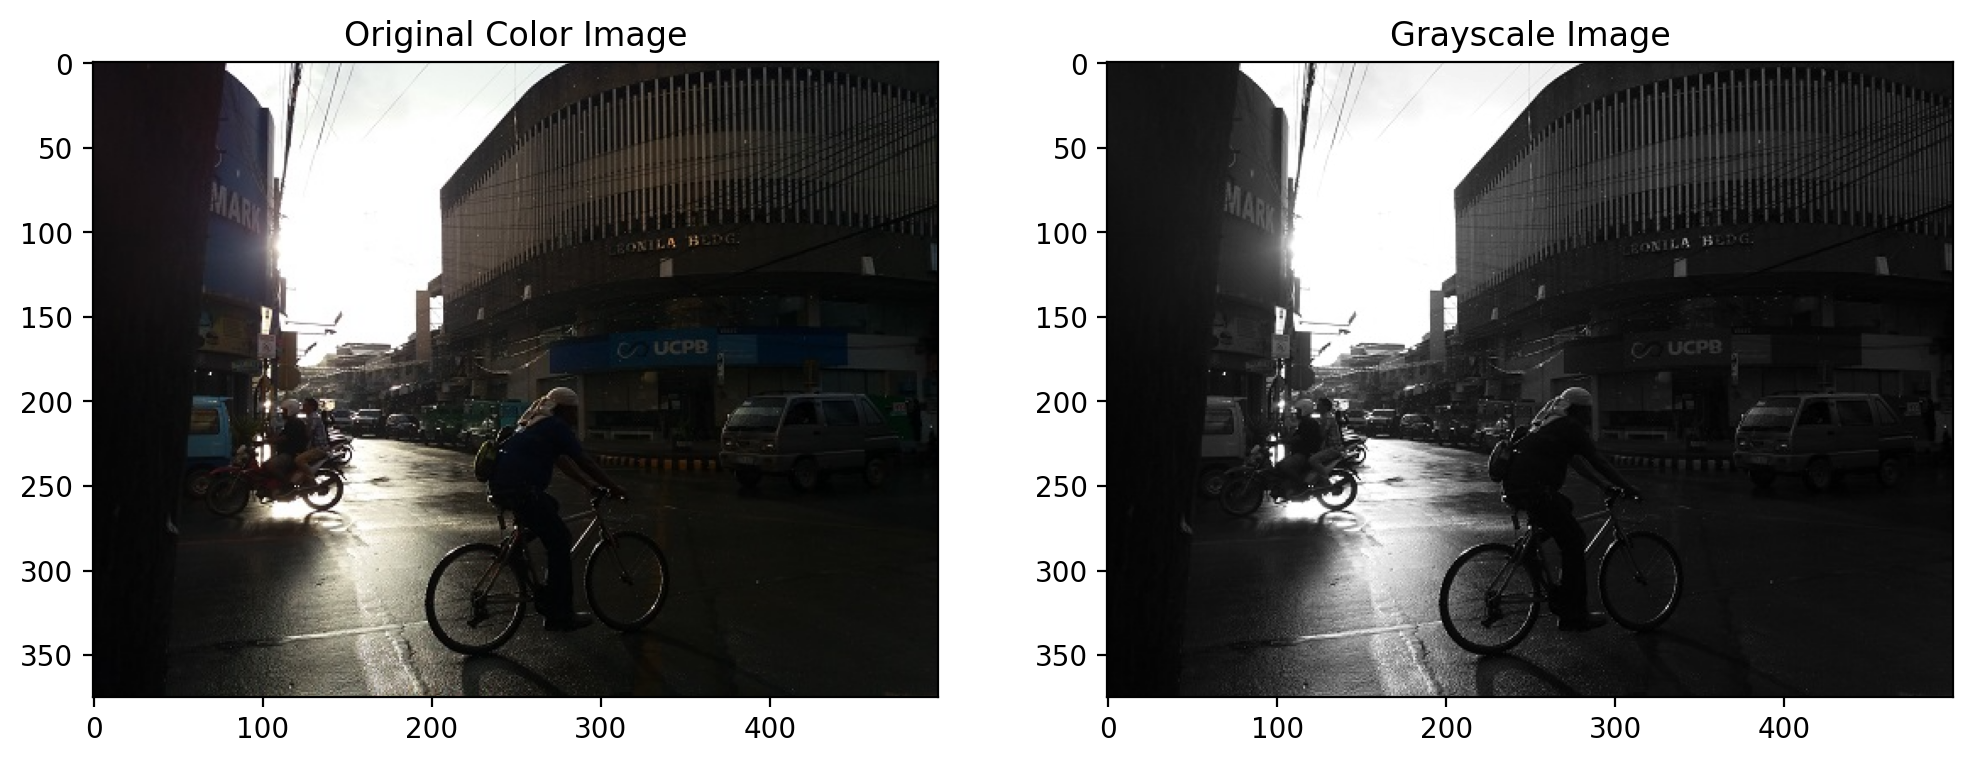

In [26]:
# Read the image - PNG file manually uploaded to working folder
img = cv2.imread('intersection.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plot the original color image and grayscale image side by side
plt.figure(figsize=[12, 6], dpi=200)

# Subplot for the original color image
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, ::-1])  # Display in RGB format
plt.title('Original Color Image')

# Subplot for the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)  # Display in grayscale
plt.title('Grayscale Image')

# Display the plot
plt.show()

### Define desired CDFs

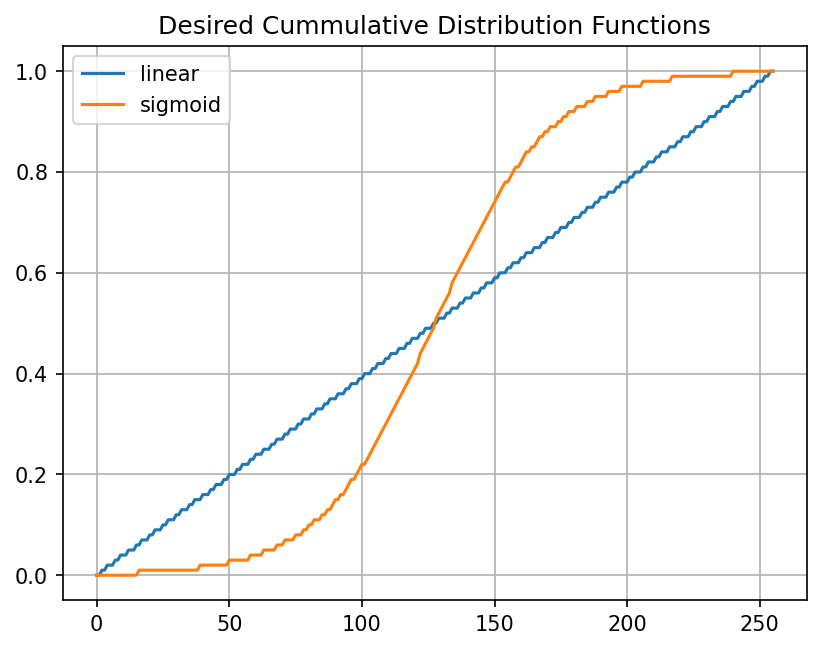

In [22]:
# Generate a linear cumulative distribution function (CDF) array
cdf_line = np.round(np.linspace(0, 1, 256), 2)

# Generate a CDF array using the sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
cdf_sig = np.round(sigmoid(np.linspace(-6, 6, 256)), 2)

plt.figure(dpi = 150)
plt.grid()
plt.title('Desired Cummulative Distribution Functions')
plt.plot(cdf_line, label = 'linear')
plt.plot(cdf_sig, label = 'sigmoid')
plt.legend()

### Define function to perform backprojection:
- It adjusts the gray values in an image to match a desired Cumulative Distribution Function (CDF).
- The function takes the original gray value, its corresponding normalized CDF, and the desired CDF.
- It finds the transformed value (T_r) in the normalized CDF and maps it to the closest value in the desired CDF.
- The new gray value is returned, representing the adjusted value for better histogram matching.

In [20]:
def backprojection(gray_value, cdf_desired, cdf_normalized):

    """
    Backprojection function for histogram matching.

    Parameters:
    - gray_value: The original gray value for which we want to find the corresponding value in the desired CDF.
    - cdf_desired: The desired Cumulative Distribution Function (CDF) to match.
    - cdf_normalized: The CDF of the original image that we want to adjust.

    Returns:
    - new_gray_value: The adjusted gray value that corresponds to the desired CDF.

    Explanation:
    This function performs backprojection, adjusting the gray value based on histogram matching.
    It finds the transformed value (T_r) in the normalized CDF, then maps it to the closest value in the desired CDF.
    The new gray value is the one that aligns with the desired CDF for better histogram matching.

    Example:
    Suppose gray_value is 100, and its normalized CDF value is 0.6.
    If in the desired CDF, the closest value to 0.6 is 110, then new_gray_value will be 110.

    Note:
    - This function assumes that cdf_desired and cdf_normalized are 1D arrays with values between 0 and 1.
    """
    # Get the T_r value from the normalized CDF
    T_r = cdf_normalized[gray_value]

    # Find the nearest value in the desired CDF to the rounded T_r value
    nearest_index = np.argmin(np.abs(cdf_desired - np.round(T_r, 2)))
    new_gray_value = nearest_index

    return new_gray_value

In [29]:
def histogram_back_projection(gray, cdf_desired):
    """
    Histogram back-projection with visualization.

    Parameters:
    - gray: Input grayscale image.
    - cdf_desired: Desired Cumulative Distribution Function (CDF) to match.

    Returns:
    - hbj: Histogram back-projected image.
    """

    # Initialize back-projection image
    hbj = np.zeros_like(gray)

    # Compute histogram and CDF of original image
    hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()

    # Apply back-projection to each pixel in the image
    for i in range(np.shape(hbj)[0]):
        for j in range(np.shape(hbj)[1]):
            gray_value = gray[i][j]
            hbj[i][j] = backprojection(gray_value, cdf_desired, cdf_normalized)

    # Compute histogram and CDF of histogram-manipulated image
    hist_, bins_ = np.histogram(hbj.flatten(), 256, [0, 256])
    cdf_ = hist_.cumsum()
    cdf_normalized_ = cdf_ / cdf_.max()

    # Plot Original and Histogram Manipulated Images
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
    ax[0].imshow(gray, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title('Original')
    ax[1].imshow(hbj, cmap='gray', vmin=0, vmax=255)
    ax[1].set_title('Histogram Manipulated')
    plt.tight_layout()
    plt.show()

    # Plot Probability Distribution Function (PDF) and Cumulative Distribution Function (CDF)
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
    ax[0].set_title('Probability Distribution Function')
    ax[0].hist(gray.flatten(), 256, [0, 256], color='r')
    ax[0].hist(hbj.flatten(), 256, [0, 256], color='b')
    ax[0].set_xlabel("Gray Value")
    ax[0].legend(('Original', 'Histogram Manipulated'))

    ax[1].set_title('Cumulative Distribution Function')
    ax[1].plot(cdf_normalized, 'r')
    ax[1].plot(cdf_normalized_, 'b')
    ax[1].set_xlabel("Gray Value")
    ax[1].legend(('Original', 'Histogram Manipulated'))
    plt.tight_layout()
    plt.show()

### Apply to image with desired linear CDF

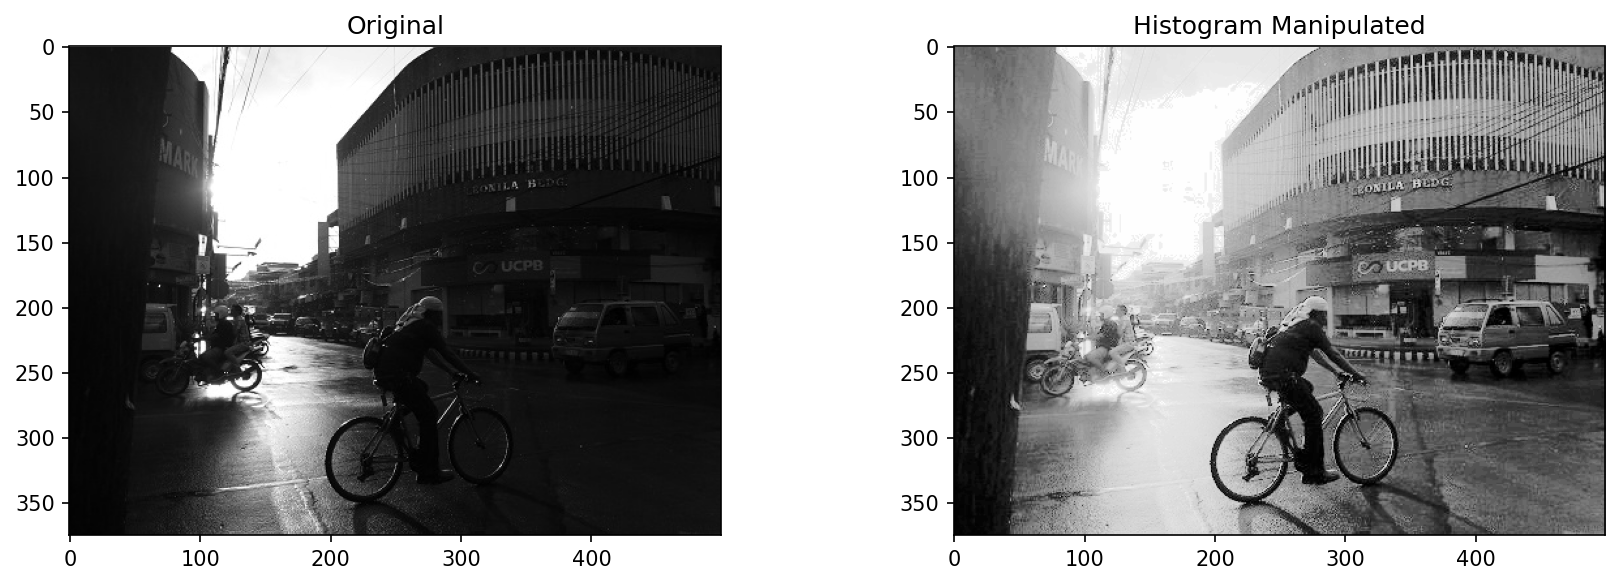

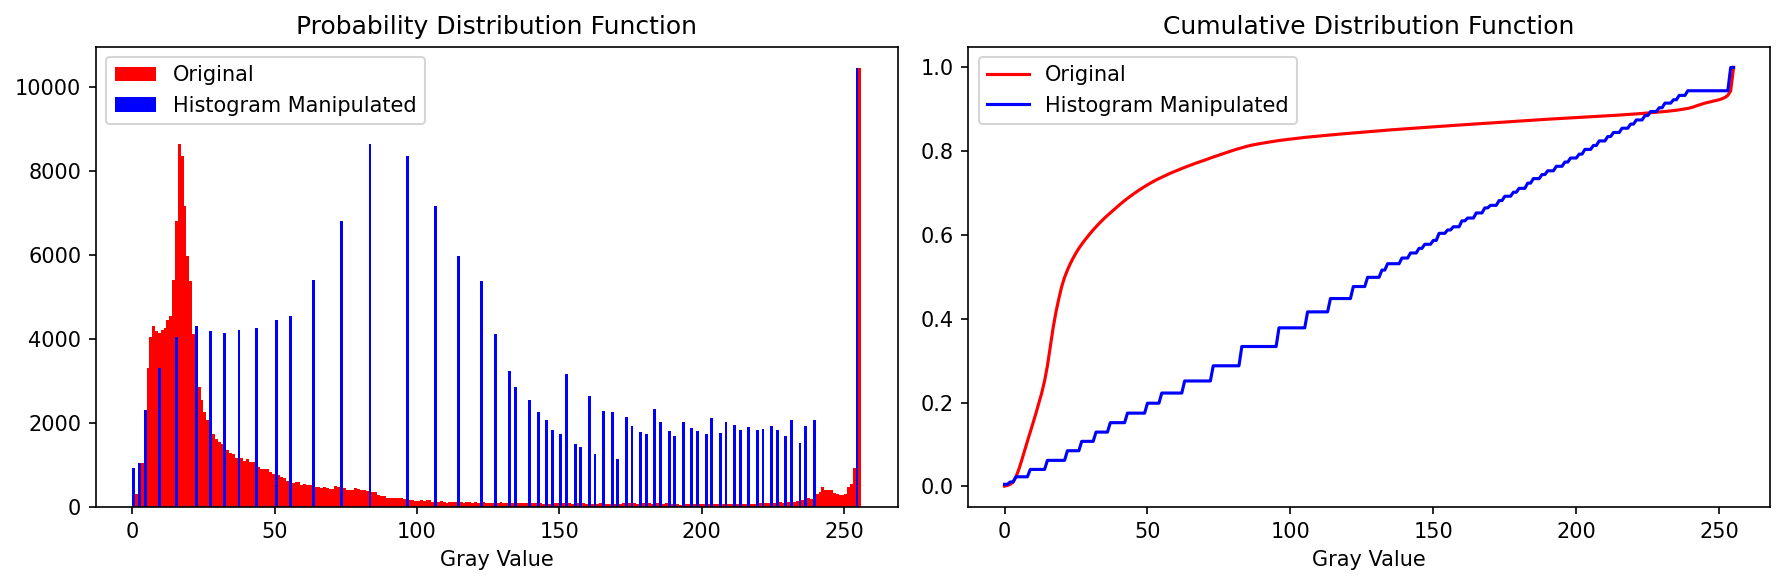

In [30]:
histogram_back_projection(gray, cdf_line)

Apply to image with desired sigmoid CDF

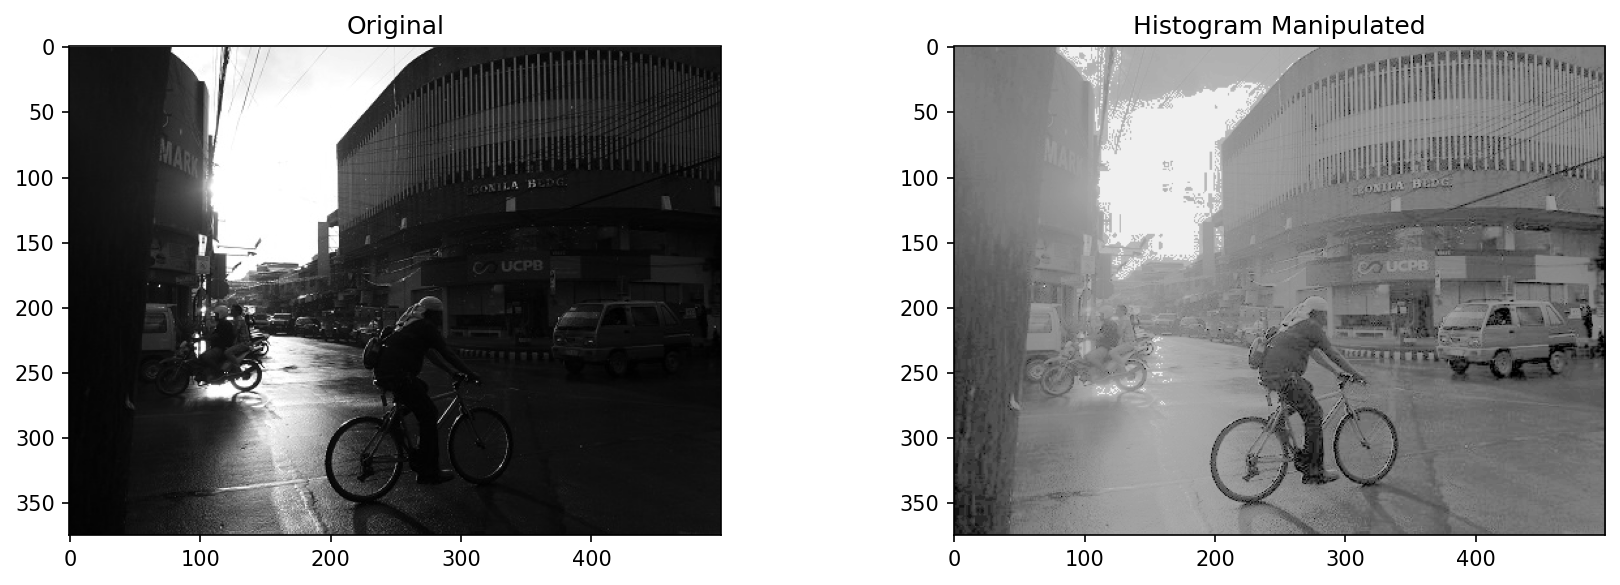

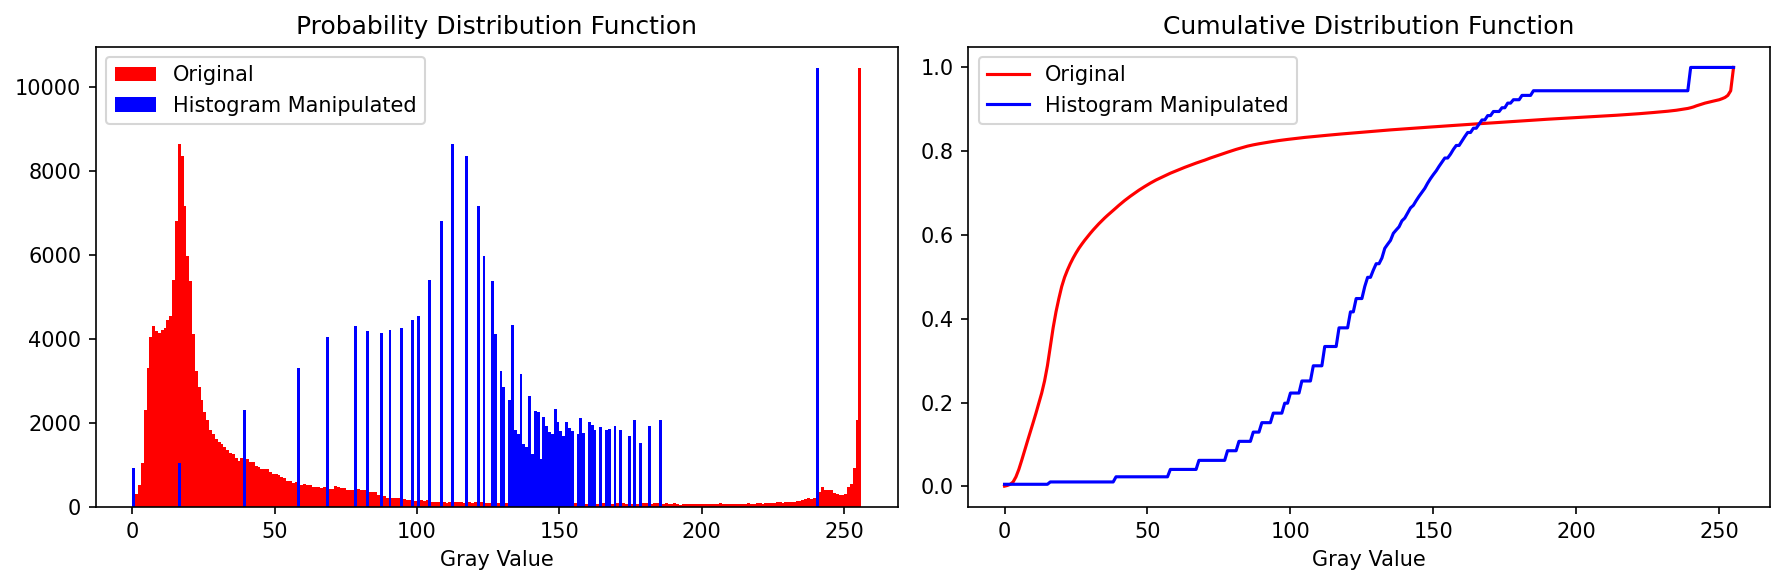

In [31]:
histogram_back_projection(gray, cdf_sig)